In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel(r"C:\Users\Vatsal Gosalia\Downloads\HR_Data_Science_Assessment.xlsx", sheet_name='Employee_Data')

In [4]:
# Let's look at the data types of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                100 non-null    int64  
 1   Age                        100 non-null    int64  
 2   Department                 100 non-null    object 
 3   Salary                     100 non-null    int64  
 4   Years_at_Company           100 non-null    int64  
 5   Performance_Rating         100 non-null    float64
 6   Promotion_in_last_5_years  100 non-null    int64  
 7   Turnover                   100 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.4+ KB


**As we can from the above information, the data types of each feature is correct and it also seems there are no null values. Let us see more deeply if the information is correct.**

In [5]:
df.shape

(100, 8)

In [6]:
# Let's find out how many missing values we have
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean(),4), '% missing values')

**Yes, from the above information, there are no null values in the dataset.**

In [7]:
# let's find out the duplicates in our dataset
df.duplicated().value_counts()

False    100
Name: count, dtype: int64

**There are no duplicates in the dataset.**

In [8]:
# Let's find out how many numerical features we have
features_numeric = [features for features in df.columns if df[features].dtypes != 'O']
print(f"Number of numerical features {len(features_numeric)}")
df[features_numeric].head()

Number of numerical features 7


,Employee_ID,Age,Salary,Years_at_Company,Performance_Rating,Promotion_in_last_5_years,Turnover
0,1,50,96250,3,3.2,0,0
1,2,36,112082,1,2.5,1,0
2,3,29,74754,1,4.8,0,1
3,4,42,51411,3,3.8,0,0
4,5,40,42911,18,3.8,1,1


**There are 7 Numerical Features in the dataset.**

In [9]:
# let's find out how many categorical features we have
features_categorical = [features for features in df.columns if df[features].dtypes == 'O']
print(f"Number of categorical features {len(features_categorical)}")
df[features_categorical].head()

Number of categorical features 1


,Department
0,HR
1,IT
2,Marketing
3,IT
4,HR


**There is only 1 categorical feature in the dataset**

In [10]:
# Let's explore the count of every value of each feature
for feature in features_numeric:
    print(df.value_counts(feature))

Employee_ID
1      1
64     1
74     1
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: count, Length: 100, dtype: int64
Age
45    7
29    6
56    5
36    4
42    4
23    4
28    4
30    4
46    4
35    4
54    3
39    3
47    3
32    3
44    3
57    3
49    3
25    3
50    3
43    3
48    2
22    2
55    2
38    2
33    2
58    2
24    2
37    2
52    1
41    1
51    1
40    1
31    1
27    1
26    1
59    1
Name: count, dtype: int64
Salary
40301     1
86975     1
94045     1
93351     1
91407     1
         ..
59830     1
59738     1
58711     1
58589     1
119909    1
Name: count, Length: 100, dtype: int64
Years_at_Company
1     9
5     9
16    8
8     6
15    6
12    6
2     6
10    6
3     6
7     5
13    5
14    5
19    5
4     4
17    4
18    4
9     2
11    2
6     2
Name: count, dtype: int64
Performance_Rating
4.9    8
4.2    7
3.9    7
3.1    6
4.0    6
4.7    6
4.6    5
3.4    5
2.6    4
4.3    4
4.1    4
3.8    4
3.7    4
4.8    4
3.2    4
3.5  

**By looking at the Turnover Values, it looks like our dataset is imbalanced.**

In [11]:
# Let's explore the count of values of categorical features
for feature in features_categorical:
    print(df.value_counts(feature))

Department
HR           25
Finance      23
IT           21
Marketing    17
Sales        14
Name: count, dtype: int64


In [12]:
# Let's look at the descriptive statistics of our dataset
for feature in features_numeric:
    print(df[feature].describe())

count    100.000000
mean      50.500000
std       29.011492
min        1.000000
25%       25.750000
50%       50.500000
75%       75.250000
max      100.000000
Name: Employee_ID, dtype: float64
count    100.000000
mean      40.060000
std       10.688255
min       22.000000
25%       30.000000
50%       41.500000
75%       48.000000
max       59.000000
Name: Age, dtype: float64
count       100.000000
mean      77329.530000
std       23671.530299
min       40301.000000
25%       56577.250000
50%       79587.000000
75%       96310.250000
max      119909.000000
Name: Salary, dtype: float64
count    100.000000
mean       9.550000
std        5.777656
min        1.000000
25%        4.750000
50%       10.000000
75%       15.000000
max       19.000000
Name: Years_at_Company, dtype: float64
count    100.000000
mean       3.866000
std        0.708708
min        2.500000
25%        3.275000
50%        3.900000
75%        4.500000
max        5.000000
Name: Performance_Rating, dtype: float64
count  

**The Data Distribution looks pretty straight forward. Let us go ahead and visually see if there are any outliers.**

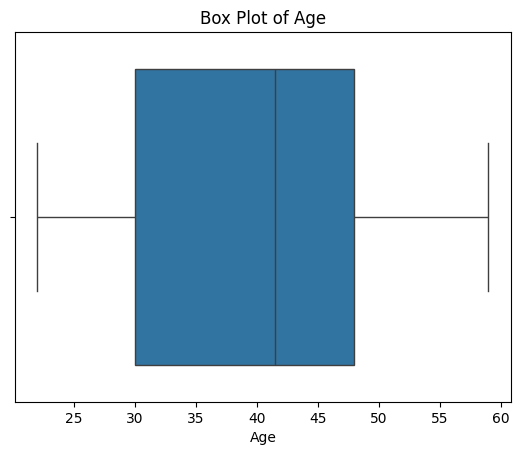

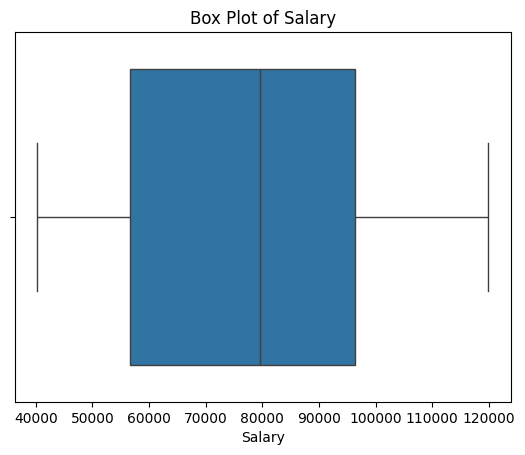

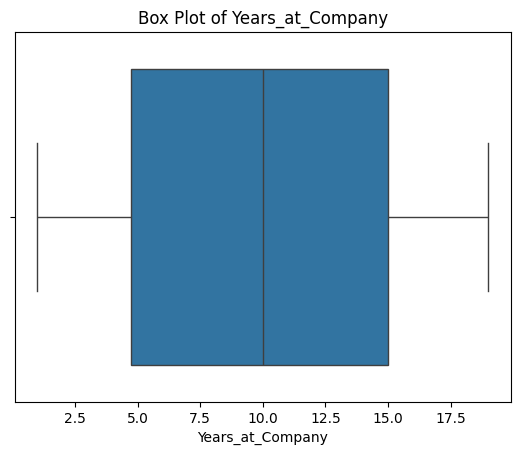

In [13]:
# let us visualize the outliers through box plots
import seaborn as sns
import matplotlib.pyplot as plt
for feature in features_numeric[1:4]:
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

**From the above boxplots, it looks like there are no outliers for numerical features in this dataset.**

In [14]:
# let's explore the correlation between our numerical features
df[features_numeric].corr()

,Employee_ID,Age,Salary,Years_at_Company,Performance_Rating,Promotion_in_last_5_years,Turnover
Employee_ID,1.000000,0.095999,0.064875,0.021965,0.060575,-0.014436,-0.083859
Age,0.095999,1.000000,0.111579,-0.031618,-0.043467,-0.083916,-0.066280
Salary,0.064875,0.111579,1.000000,0.066315,0.144474,0.035760,0.029914
Years_at_Company,0.021965,-0.031618,0.066315,1.000000,0.172853,0.157316,-0.017658
Performance_Rating,0.060575,-0.043467,0.144474,0.172853,1.000000,0.118763,-0.021704
Promotion_in_last_5_years,-0.014436,-0.083916,0.035760,0.157316,0.118763,1.000000,0.125466
Turnover,-0.083859,-0.066280,0.029914,-0.017658,-0.021704,0.125466,1.000000


**The above general correlation does not tell us much about features influencing the employee Turnover as our dataset is imbalanced, let us take all the independent variables with target variable and form our hypothesis and testing as it will take care of the imbalanced dataset.**

# Formulating Hypothesis

## Statistical Significance - p-value < 0.05 , meaning we will reject the null hypothesis only if the p-value is less than 0.05.

## Hypothesis 1  

**Null Hypothesis** - There is no association between age and employee turnover.
**Alternate Hypothesis** - Age influences employee turnover – Older employees are less likely to leave.

## Hypothesis 2 
**Null Hypothesis** - Higher salary is not associated with lower turnover rates.
**Alternate Hypothesis** - Higher salary is associated with lower turnover rates.

## Hypothesis 3 
**Null Hypothesis** - There is no association between departments and high turnover rates.
**Alternate Hypothesis** - Employees in certain departments (eg.sales) have higher turnover rates.

## Hypothesis 4 
**Null Hypothesis** - Employees with fewer years at the company are not associated with high turnover.
**Alternate Hypothesis** - Employees with fewer years at the company are associated with high turnover.

## Hypothesis 5 
**Null Hypothesis** - There is no association between employees receiving promotions in the last 5 years and turnover.
**Alternate Hypothesis** - Employees who received promotions in the last 5 years are less likely to leave.

## Hypothesis 6
**Null Hypothesis** - Performance ratings are not associated with high turnover
**Alternate Hypothesis** - Performance ratings are associated with high turnover. 

# Task 2 Testing Hypothesis

In [15]:
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import fisher_exact, chi2_contingency

In [16]:
# Encode the categorical type department
label_encoder = LabelEncoder()
df['department_encoded'] = label_encoder.fit_transform(df['Department'])

In [17]:
# distribute churners and non-churners

turnover_yes = df[df['Turnover'] == 1]
turnover_no = df[df['Turnover'] == 0]

In [18]:
# t-test for between two groups (salary of those who stayed and salary of those who left)

t_stat_salary, p_value_salary = stats.ttest_ind(turnover_yes['Salary'], turnover_no['Salary'], equal_var=False)
print(f"t-test for Salary (Welch's t-test): t-statistic = {t_stat_salary}, p-value = {p_value_salary}")

t-test for Salary (Welch's t-test): t-statistic = 0.30713756652852037, p-value = 0.7611815950353285


In [19]:
# t-test for between two groups (age of those who stayed and age of those who left)

t_stat_age, p_value_age = stats.ttest_ind(turnover_yes['Age'], turnover_no['Age'], equal_var=False)
print(f"t-test for Age (Welch's t-test): t-statistic = {t_stat_age}, p-value = {p_value_age}")

t-test for Age (Welch's t-test): t-statistic = -0.6758000889818147, p-value = 0.5051843954476157


In [20]:
# t-test for between two groups (tenure of those who stayed and tenure of those who left)

t_stat_Years_at_Company, p_value_Years_at_Company = stats.ttest_ind(turnover_yes['Years_at_Company'], turnover_no['Years_at_Company'], equal_var=False)
print(f"t-test for Years_at_Company (Welch's t-test): t-statistic = {t_stat_Years_at_Company}, p-value = {p_value_Years_at_Company}")

t-test for Years_at_Company (Welch's t-test): t-statistic = -0.1617919613191064, p-value = 0.8728686742316748


In [21]:
# t-test for between two groups (performance of those who stayed and performance of those who left)

t_stat_Performance_Rating, p_value_Performance_Rating = stats.ttest_ind(turnover_yes['Performance_Rating'], turnover_no['Performance_Rating'], equal_var=False)
print(f"t-test for Performance_Rating (Welch's t-test): t-statistic = {t_stat_Performance_Rating}, p-value = {p_value_Performance_Rating}")

t-test for Performance_Rating (Welch's t-test): t-statistic = -0.20393743299740172, p-value = 0.8401388036490085


In [22]:
# fisher exact test for between two groups (promotion and turnover) we do this test provided both the groups are of shape (2,2)

contigency_table = pd.crosstab(df['Promotion_in_last_5_years'],df['Turnover'])
oddsratio, p_value_fisher = fisher_exact(contigency_table)
print(f"Fisher's exact test for Promotion_in_last_5_years: p-value = {p_value_fisher}")

Fisher's exact test for Promotion_in_last_5_years: p-value = 0.2450716924362349


In [23]:
# Chi-Square test between department and turnover

contingency_table = pd.crosstab(df['department_encoded'],df['Turnover'])
chi2, p_value, dof, expected = chi2_contingency(contigency_table)
print(f"Chi Square test for Department: p-value = {p_value}")

Chi Square test for Department: p-value = 0.3362918480088305


**In all the above tests, p-value is not less than 0.05 which tells us that none of the variables analysed show a statistically significant effect on Turnover in this sample. Which means we fail to reject the null hypothesis for all tests.**

In [24]:
# Add new features to our dataset

def tenure_category(years):
    if years < 3:
        return 'Short'
    elif 3 <= years <= 7:
        return 'Medium'
    else:
        return 'Long'

def age_category(age):
    if age < 30:
        return 'Young'
    elif 30 <= age <= 45:
        return 'Middle-Aged'
    else:
        return 'Senior'
        
df['Tenure_Category'] = df['Years_at_Company'].apply(tenure_category)
df['Salary_to_Age_Ratio'] = df['Salary'] / df['Age']
df['Performance_Promotion_Interaction'] = df['Performance_Rating'] * df['Promotion_in_last_5_years']
department_turnover_rate = df.groupby('department_encoded')['Turnover'].mean()
df['Department_Turnover_Rate'] = df['department_encoded'].map(department_turnover_rate)
df['Recent_Promotion'] = df['Promotion_in_last_5_years'].apply(lambda x: 1 if x == 1 else 0)
avg_performance_by_dept = df.groupby('department_encoded')['Performance_Rating'].mean()
df['Relative_Performance'] = df['Performance_Rating'] - df['department_encoded'].map(avg_performance_by_dept)
df['Age_Category'] = df['Age'].apply(age_category)
df['Salary_Percentile'] = df.groupby('department_encoded')['Salary'].rank(pct=True)

df.head()


,Employee_ID,Age,Department,Salary,Years_at_Company,Performance_Rating,Promotion_in_last_5_years,Turnover,department_encoded,Tenure_Category,Salary_to_Age_Ratio,Performance_Promotion_Interaction,Department_Turnover_Rate,Recent_Promotion,Relative_Performance,Age_Category,Salary_Percentile
0,1,50,HR,96250,3,3.2,0,0,1,Medium,1925.000000,0.0,0.200000,0,-0.572000,Senior,0.640000
1,2,36,IT,112082,1,2.5,1,0,2,Short,3113.388889,2.5,0.142857,1,-1.133333,Middle-Aged,0.952381
2,3,29,Marketing,74754,1,4.8,0,1,3,Short,2577.724138,0.0,0.294118,0,0.800000,Young,0.705882
3,4,42,IT,51411,3,3.8,0,0,2,Medium,1224.071429,0.0,0.142857,0,0.166667,Middle-Aged,0.190476
4,5,40,HR,42911,18,3.8,1,1,1,Long,1072.775000,3.8,0.200000,1,0.028000,Middle-Aged,0.080000


# Relevance of the New Features

**Tenure Category** - Employees with different tenures may show different tendencies towards turnover. For example, Employees with shorter tenure might leave more often due to unmet expectations.

**Salary to Age Ratio** - This can reflect perceived fairness in compensation, which strongly impacts job satisfaction and turnover. A lower Ratio could mean employee feels undercompensated for their experience. 

**Performance Promotion Interaction** - Capturing the interaction between good performance and lack of promotion highlights frustration or feelings of being undervalued  among high-performing employees.

**Department Turnover Rate** - Employees in departments with historically high turnover may feel less stable and more inclined to leave, contributing to a self-perpetuating turnover cycle.

**Recent Promotion** - Receiving a recent promotion is often associated with greater job satisfaction and reduced turnover, so this is a relevant feature.

**Relative Performance** - Employees who perform significantly better or worse than their peers may have different attitudes towards staying at the company. Low performers may leave due to dissatisfaction, while high performers might have better external opportunities.

**Age Category** - Different age groups tend to have different career priorities, mobility and turnover tendencies, so categorizing employees by age can add valuable predictive power.

**Salary Percentile** - Employees earning significantly less than their peers in the same department may feel underappreciated or undervalued increasing their likelihood of leaving. 

In [25]:
# Label encode the categorical new features

df['Tenure_Category_encoded'] = label_encoder.fit_transform(df['Tenure_Category'])
df['Age_Category_encoded'] = label_encoder.fit_transform(df['Age_Category'])

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_classification


In [27]:
# Distribute the new dataset into independent and dependent variables

X = df[['Age', 'Salary', 'Years_at_Company', 'Performance_Rating', 'Promotion_in_last_5_years', 'department_encoded','Tenure_Category_encoded', 'Age_Category_encoded','Salary_to_Age_Ratio', 'Performance_Promotion_Interaction','Department_Turnover_Rate', 'Recent_Promotion', 'Relative_Performance','Salary_Percentile']]
y = df['Turnover']

In [28]:
# Split the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [29]:
# Standardize the independent variable

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Oversample the minority class

smote = SMOTE(random_state=42)
X_train_smote_scaled, y_train_smote_scaled= smote.fit_resample(X_train_scaled, y_train)

In [31]:
# Build the Random Forest Model with personalized weights to handle the class imbalance

weights = {0:1, 1:5}
model = RandomForestClassifier(class_weight=weights, random_state=42)
model.fit(X_train_smote_scaled, y_train_smote_scaled)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        26
           1       0.00      0.00      0.00         4

    accuracy                           0.87        30
   macro avg       0.43      0.50      0.46        30
weighted avg       0.75      0.87      0.80        30



C:\Users\Vatsal Gosalia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Vatsal Gosalia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vatsal Gosalia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vatsal Gosalia\AppData\Local\Programs\Python\Python312\Lib\

**Accuracy**: The overall accuracy of the model is 0.87, meaning 87% of the predictions (both churn and non-churn) were correct

**Classification Report**: 

**For class 0 (Non Churners)**: 
**Precision: 0.87** - This means that when the model predicted an employee will not churn, it was correct 87% of the time
**Recall: 1.00** - Out of all actual non-churners, the model correctly identified 100% of them
**F1 score: 0.93** - The F1-score, which is harmonic mean of precision and recall, indicates strong overall performance for predicting non-churners

**For class 1 (Churners)**:
**Precision: 0.00** - The precision for churners is 0 because the model did not any employees to churn (no true positives)
**Recall: 0.00** - The recall is also 0 because the model failed to identify any of the actual churners.
**F1 score: 0.00** - Since both precision and recall are 0, F1-score is also 0, meaning the model performed very poorly for this class.

In [32]:
# Explore which features are more responsible for predicting turnover

feature_importance = model.feature_importances_
feature_names = X.columns
feature_importance_list = list(zip(feature_names,feature_importance))
sorted_feature_importance = sorted(feature_importance_list,key=lambda x: x[1], reverse=True)
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance:.4f}")


Feature: Relative_Performance, Importance: 0.1290
Feature: Department_Turnover_Rate, Importance: 0.1275
Feature: Salary, Importance: 0.1160
Feature: Years_at_Company, Importance: 0.0978
Feature: Age, Importance: 0.0959
Feature: Salary_to_Age_Ratio, Importance: 0.0854
Feature: Salary_Percentile, Importance: 0.0842
Feature: department_encoded, Importance: 0.0766
Feature: Performance_Rating, Importance: 0.0608
Feature: Age_Category_encoded, Importance: 0.0512
Feature: Tenure_Category_encoded, Importance: 0.0332
Feature: Performance_Promotion_Interaction, Importance: 0.0224
Feature: Recent_Promotion, Importance: 0.0138
Feature: Promotion_in_last_5_years, Importance: 0.0064


# Model Interpretation

**Top Influencers**: The most important features such as Relative Performance, Department Turnover Rate and Salary suggest that an employee's performance, the environment within their department and their compensation are the biggest drivers of whether they stay or leave. 

**Actions to take**: Focus on departments with higher turnover rates and provide additional resources, such as training, team-building activities, or better management practices. Also, ensure competitive salary packages aligned with performance to retain high-performing employees.

**Salary-Related Features**: Several salary-related features (eg. Salar, salary to age ratio, Salary percentile) are significant, implying that financial factors are critical in predicting churn. 

**Actions to take**: Conduct regular salary benchmarking and adjust compensation to match or exceed industry standards. Ensure salary progression is transparent and equitable across employees with similar tenure and performance. Offering competitive raises or bonuses can help mitigate churn.

**Department and Tenure**: The Department Turnover rate and how long an employee has been with the company are also major factors. Departments with high churn rates or employees with shorter tenure may be more vulnerable to turnover. 

**Actions to take**: i.	Actions to take: Focus on supporting new employees or employees in departments with high turnover rates. Implement targeted onboarding programs, mentoring, and regular check-ins to improve retention rates early in an employee’s career. For departments with high churn, perform internal surveys or assessments to identify underlying causes and address them.

**Promotion and Performance**: While performance and recent promotions matter, they play a slightly smaller role than expected. 

**Actions to take**: Ensure that promotion and performance recognition processes are transparent and fair, even if they are not as critical as salary in influencing churn. Regularly provide opportunities for career progression and ensure employees feel recognized and rewarded for their performance, even if not promoted immediately.

Now let us focus on improving the important features with the highest importance for better model performance or better insights. For example we can combine Salary and Years at Company or we can reduce the number of features by eliminating less important feature to get better results. 

In [33]:
# Add new feature to see if people with longer tenures have higher salaries or not

df['Salary_to_tenure_ratio'] = df['Salary'] / df['Years_at_Company'] 

In [34]:
df.head()

,Employee_ID,Age,Department,Salary,Years_at_Company,Performance_Rating,Promotion_in_last_5_years,Turnover,department_encoded,Tenure_Category,Salary_to_Age_Ratio,Performance_Promotion_Interaction,Department_Turnover_Rate,Recent_Promotion,Relative_Performance,Age_Category,Salary_Percentile,Tenure_Category_encoded,Age_Category_encoded,Salary_to_tenure_ratio
0,1,50,HR,96250,3,3.2,0,0,1,Medium,1925.000000,0.0,0.200000,0,-0.572000,Senior,0.640000,1,1,32083.333333
1,2,36,IT,112082,1,2.5,1,0,2,Short,3113.388889,2.5,0.142857,1,-1.133333,Middle-Aged,0.952381,2,0,112082.000000
2,3,29,Marketing,74754,1,4.8,0,1,3,Short,2577.724138,0.0,0.294118,0,0.800000,Young,0.705882,2,2,74754.000000
3,4,42,IT,51411,3,3.8,0,0,2,Medium,1224.071429,0.0,0.142857,0,0.166667,Middle-Aged,0.190476,1,0,17137.000000
4,5,40,HR,42911,18,3.8,1,1,1,Long,1072.775000,3.8,0.200000,1,0.028000,Middle-Aged,0.080000,0,0,2383.944444


In [35]:
# Add threshold to filter the most important features

threshold = 0.07

important_features = [feature for feature, importance in sorted_feature_importance if importance > threshold] 

X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

In [36]:
# scale the reduced independent train and test set

X_train_scaled_reduced = scaler.fit_transform(X_train_reduced)
X_test_scaled_reduced = scaler.transform(X_test_reduced)

In [37]:
#Oversampling the minority class

smote = SMOTE(random_state=42)
X_train_smote_scaled_reduced, y_train_smote_scaled_reduced = smote.fit_resample(X_train_scaled_reduced, y_train)

In [38]:
# rebuilding the model after feature reduction

model_reduced = RandomForestClassifier(random_state=42)
model_reduced.fit(X_train_smote_scaled_reduced, y_train_smote_scaled_reduced)

y_pred_reduced = model_reduced.predict(X_test_scaled_reduced)
print(classification_report(y_test, y_pred_reduced))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.17      0.25      0.20         4

    accuracy                           0.73        30
   macro avg       0.52      0.53      0.52        30
weighted avg       0.78      0.73      0.75        30



In [39]:
# Model optimization by applying grid search

from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced']
}

stratified_kfold = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=stratified_kfold,n_jobs=-1, verbose=2)

grid_search.fit(X_train_smote_scaled_reduced,y_train_smote_scaled_reduced)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\Vatsal Gosalia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
284 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vatsal Gosalia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vatsal Gosalia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Vatsal Gosalia\AppData\Local\Programs\Python\Pyt

Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8581027667984189


In [40]:
# predicting by using the best estimator

y_prob = grid_search.best_estimator_.predict_proba(X_test_scaled_reduced)

threshold = 0.27
y_pred_adjusted = (y_prob[:, 1] >= threshold).astype(int)
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.92      0.42      0.58        26
           1       0.17      0.75      0.27         4

    accuracy                           0.47        30
   macro avg       0.54      0.59      0.43        30
weighted avg       0.82      0.47      0.54        30



# Key observations

## Class 1 (Churners performance):

**Before Feature reduction and Optimization**:
Precision was 0.00, recall was 0.00 and F-1 score was 0.00 meaning the model failed to predict and identify any churners.

**After Feature Reduction and Optimization**:
Precision improved to 0.17 meaning it correctly predicted 17% of churners. Recall improved significantly to 0.75, meaning the model is now identifying 75% of churners. The F-1 score improved from 0.00 to 0.27 reflecting significant improvement in predicting churners.

## Class 0 (Non Churners Performance):

**Before Feature reduction and Optimization**:
Precision was 0.87, recall was 1.00, and F1-score was 0.93—the model performed very well for non-churners.

**After Feature Reduction and Optimization**:
Precision improved to 0.92, but recall dropped significantly to 0.42, indicating the model is now more focused on identifying churners, but it is missing more non-churners. F1-Score for non-churners decreased from 0.93 to 0.58 due to the trade-off of improving churner identification


## Overall Model Performance

**Before Feature reduction and Optimization**:
The model had an accuracy of 0.87, but it was biased towards predicting non-churners.The macro and weighted average F1-scores were 0.46 and 0.80, respectively, indicating that the model was performing well overall but completely missed churners.


**After Feature Reduction and Optimization**:
The accuracy dropped to 0.47, reflecting the trade-off for increasing recall for churners. The macro average recall improved from 0.50 to 0.59, showing better balance between classes. The weighted F1-score decreased from 0.80 to 0.54, indicating that the overall performance dropped slightly, but the model is now better at predicting churners. 


## Conclusion:

**Before Feature reduction and Optimization**: The model had high accuracy and strong performance on non-churners but completely missed churners.

**After Feature Reduction and Optimization**:
The model improved significantly in predicting churners, with a recall of 0.75 for churners. However, this improvement came at the cost of lower performance on non-churners and a drop in overall accuracy.
